# Dev test

In [1]:
import os
import micromagneticdata as md

In [2]:
dirname = os.path.join('..', 'micromagneticdata', 'tests', 'test_sample')

In [3]:
data = md.Data(name='system_name', dirname=dirname)

In [4]:
data.n

7

In [5]:
data.info

,drive_number,date,time,driver,t,n,Hmin,Hmax
0,0,2022-02-11,12:51:44,TimeDriver,2.500000e-11,25.0,NaN,NaN
1,1,2022-02-11,12:51:45,TimeDriver,1.500000e-11,15.0,NaN,NaN
2,2,2022-02-11,12:51:45,TimeDriver,5.000000e-12,10.0,NaN,NaN
3,3,2022-02-11,12:51:46,MinDriver,NaN,NaN,NaN,NaN
4,4,2022-02-11,12:51:46,TimeDriver,5.000000e-12,5.0,NaN,NaN
5,5,2022-02-11,12:51:46,MinDriver,NaN,NaN,NaN,NaN
6,6,2022-02-11,12:51:47,HysteresisDriver,NaN,21.0,"[0, 0, 1000000.0]","[0, 0, -1000000.0]"


In [6]:
drive = data[0]

In [7]:
drive.n

25

In [8]:
drive.info

{'drive_number': 0,
 'date': '2022-02-11',
 'time': '12:51:44',
 'driver': 'TimeDriver',
 't': 2.5e-11,
 'n': 25}

In [9]:
data.selector()

BoundedIntText(value=0, description='drive', max=6)

In [10]:
drive = data[-1]

In [11]:
drive.x

'B_hysteresis'

In [12]:
drive.info

{'drive_number': 6,
 'date': '2022-02-11',
 'time': '12:51:47',
 'driver': 'HysteresisDriver',
 'Hmin': [0, 0, 1000000.0],
 'Hmax': [0, 0, -1000000.0],
 'n': 21}

In [13]:
print(drive.mif)

# MIF 2.2

SetOptions {
  basename system_name
  scalar_output_format %.12g
  scalar_field_output_format {binary 8}
  vector_field_output_format {binary 8}
}

# BoxAtlas for main_atlas
Specify Oxs_BoxAtlas:main_atlas {
  xrange { 0.0 1e-07 }
  yrange { 0.0 5e-08 }
  zrange { 0.0 2e-08 }
  name main
}

# RectangularMesh
Specify Oxs_RectangularMesh:mesh {
  cellsize { 5e-09 5e-09 5e-09 }
  atlas :main_atlas
}

# UniformExchange
Specify Oxs_UniformExchange:exchange {
  A 1.3e-11
}

# FixedZeeman
Specify Oxs_FixedZeeman:zeeman {
  field {0.0 0.0 1000000.0}
}

# m0 file
Specify Oxs_FileVectorField:m0 {
  file m0.omf
  atlas :main_atlas
}

# m0_norm
Specify Oxs_VecMagScalarField:m0_norm {
    field :m0
}

# CGEvolver
Specify Oxs_CGEvolve:evolver {
}

# OxS_UZeeman
Specify Oxs_UZeeman:hysteresis {
  Hrange {
    { 0 0 1000000.0 0 0 -1000000.0 20 }
    { 0 0 -1000000.0 0 0 1000000.0 20 }
  }
}

# MinDriver
Specify Oxs_MinDriver {
  evolver :evolver
  mesh :mesh
  Ms :m0_norm
  m0 :m0
  stoppin

In [14]:
drive.m0

Field(Mesh(Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4), attributes: (unit: m, fourierspace: False, isplane: False)), dim=3, components: (x, y, z))

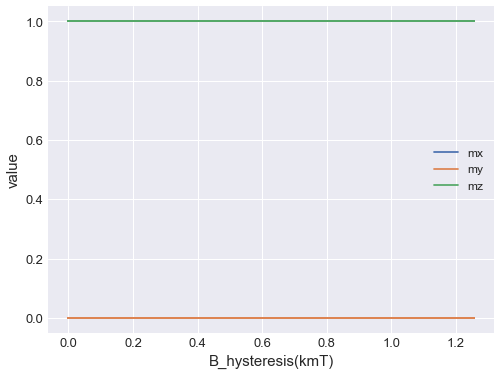

In [15]:
drive.table.mpl(x='B_hysteresis', y=['mx', 'my', 'mz'])

In [16]:
drive.n

41

In [17]:
drive[0]

Field(Mesh(Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4), attributes: (unit: m, fourierspace: False, isplane: False)), dim=3, components: (x, y, z))

In [18]:
list(drive)

[Field(Mesh(Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4), attributes: (unit: m, fourierspace: False, isplane: False)), dim=3, components: (x, y, z)),
 Field(Mesh(Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4), attributes: (unit: m, fourierspace: False, isplane: False)), dim=3, components: (x, y, z)),
 Field(Mesh(Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4), attributes: (unit: m, fourierspace: False, isplane: False)), dim=3, components: (x, y, z)),
 Field(Mesh(Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4), attributes: (unit: m, fourierspace: False, isplane: False)), dim=3, components: (x, y, z)),
 Field(Mesh(Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4), attributes: (unit: m, fourierspace: False, isplane: False)), dim=3, components: (x, y, z)),
 Field(Mesh(Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4), attributes: (unit: m, fourierspace: False, isplane: Fa

In [19]:
#drive.ovf2vtk()

In [20]:
drive.slider()

IntSlider(value=0, description='step', max=40)

In [21]:
data[-2].info

{'drive_number': 5,
 'date': '2022-02-11',
 'time': '12:51:46',
 'driver': 'MinDriver'}

In [22]:
data[-2].n

14

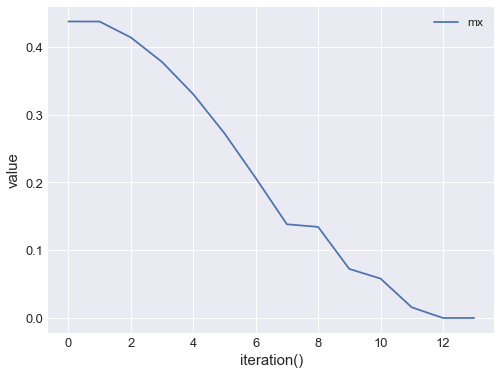

In [23]:
data[-2].table.mpl(y=['mx'])